In [1]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##  read img and its data
img=plt.imread('elantra.png')

In [3]:
img.dtype

dtype('float32')

In [4]:
def imshow(im):
    plt.imshow(im)
    plt.xticks([])  ##remove x and y
    plt.yticks([])
    plt.show

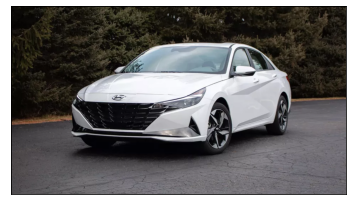

In [5]:
## image is the combination of pixels
## pixels are light information

imshow(img)

In [6]:
img.shape

(528, 940, 4)

In [7]:
img

array([[[0.07058824, 0.0627451 , 0.05490196, 1.        ],
        [0.12156863, 0.11372549, 0.10588235, 1.        ],
        [0.12156863, 0.11372549, 0.10588235, 1.        ],
        ...,
        [0.09019608, 0.07450981, 0.0627451 , 1.        ],
        [0.10980392, 0.09411765, 0.07843138, 1.        ],
        [0.11764706, 0.10196079, 0.09019608, 1.        ]],

       [[0.06666667, 0.05882353, 0.05098039, 1.        ],
        [0.10588235, 0.09803922, 0.09411765, 1.        ],
        [0.09411765, 0.08627451, 0.07843138, 1.        ],
        ...,
        [0.08627451, 0.07058824, 0.05882353, 1.        ],
        [0.10196079, 0.08627451, 0.07450981, 1.        ],
        [0.11764706, 0.10196079, 0.09019608, 1.        ]],

       [[0.05490196, 0.04705882, 0.04313726, 1.        ],
        [0.09019608, 0.08235294, 0.07450981, 1.        ],
        [0.05490196, 0.04705882, 0.04313726, 1.        ],
        ...,
        [0.08627451, 0.07058824, 0.05098039, 1.        ],
        [0.09411765, 0.078431

In [8]:
img.max()

1.0

In [9]:
pixels = np.reshape(img,(img.shape[0]*img.shape[1],img.shape[2]))
pixels.shape

(496320, 4)

In [10]:
som = MiniSom(x=3,y=3,input_len=4,sigma=0.1,learning_rate=0.2)   #### input_len=3 if 3 layers in image else accordingly

In [11]:
som.random_weights_init(pixels)

In [12]:
initial_weights =som.get_weights().copy()
initial_weights

array([[[0.5529412 , 0.40000001, 0.29019609, 1.        ],
        [0.05882353, 0.04705882, 0.01568628, 1.        ],
        [0.81568629, 0.82745099, 0.85882354, 1.        ]],

       [[0.44313726, 0.43137255, 0.45490196, 1.        ],
        [0.05882353, 0.03921569, 0.00784314, 1.        ],
        [0.10588235, 0.07843138, 0.03529412, 1.        ]],

       [[0.03921569, 0.04313726, 0.02352941, 1.        ],
        [0.15686275, 0.14901961, 0.10588235, 1.        ],
        [0.40392157, 0.39215687, 0.41176471, 1.        ]]])

In [13]:
som.train_random(pixels,50,verbose=True)

 [ 50 / 50 ] 100% - 0:00:00 left 
 quantization error: 0.08091683025106786


C:\ProgramData\Anaconda3\lib\site-packages\minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


In [14]:
data_qt = som.quantization(pixels)  ### data after quantization
data_qt

array([[0.0647599 , 0.0581173 , 0.03760697, 1.        ],
       [0.15564888, 0.14422938, 0.11717493, 1.        ],
       [0.15564888, 0.14422938, 0.11717493, 1.        ],
       ...,
       [0.40392157, 0.39215687, 0.41176471, 1.        ],
       [0.40392157, 0.39215687, 0.41176471, 1.        ],
       [0.44313726, 0.43137255, 0.45490196, 1.        ]])

In [15]:
data_qt.shape

(496320, 4)

In [16]:
k = data_qt.reshape(img.shape)
k.shape

(528, 940, 4)

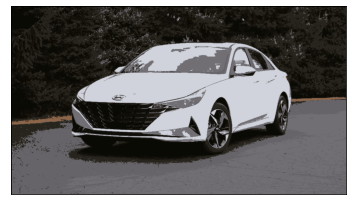

In [17]:
imshow(k)

In [18]:
plt.imsave('car.png',k)

In [19]:
k.dtype

dtype('float64')